## Import All required packages

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

## Read the Churn Dataset Input

In [30]:
df=pd.read_csv('Customer_Churn_Dataset_input.csv')

In [31]:
df

,CustomerID,Age,Gender,Income,Account_Length,Contract_Type,Call_Duration,Data_Usage,Churn
0,1,56,1,57198,13,2,752,385,1
1,2,69,1,28820,22,2,834,93,0
2,3,46,0,44070,19,1,979,221,1
3,4,32,1,89768,34,0,403,203,0
4,5,60,1,31122,14,0,628,137,0
...,...,...,...,...,...,...,...,...,...
995,996,18,1,28906,16,2,58,316,0
996,997,35,0,56914,34,0,824,380,1
997,998,49,0,130350,2,0,39,144,0
998,999,64,1,65379,35,0,236,326,1


## Describe the data

In [32]:
df.describe()

,CustomerID,Age,Gender,Income,Account_Length,Contract_Type,Call_Duration,Data_Usage,Churn
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,49.857000,0.523000,86103.117000,24.731000,0.980000,497.206000,259.361000,0.246000
std,288.819436,18.114267,0.499721,37880.237846,13.923451,0.830837,285.850114,141.943357,0.430894
min,1.000000,18.000000,0.000000,20281.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,250.750000,35.000000,0.000000,52520.250000,13.000000,0.000000,254.500000,142.750000,0.000000
50%,500.500000,50.000000,1.000000,86348.500000,24.000000,1.000000,498.000000,258.000000,0.000000
75%,750.250000,66.000000,1.000000,119663.000000,36.000000,2.000000,748.250000,386.250000,0.000000
max,1000.000000,79.000000,1.000000,149972.000000,49.000000,2.000000,999.000000,499.000000,1.000000


# Missing Value Verification

In [33]:
features_na = [feature for feature in df.columns if df[feature].isnull().sum() > 1]

for feature in features_na:
    print(f"{feature}, {round(df[feature].isnull().mean(), 4)} % Missing values")

## Understanding the correlation between the features and Target Variable

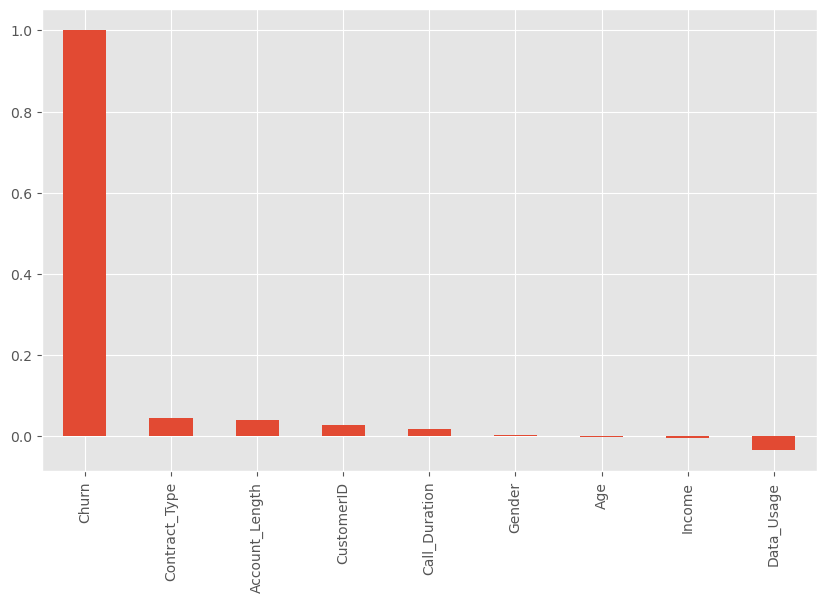

In [34]:
plt.figure(figsize=(10,6))
df.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")
plt.savefig("correlation.png", dpi=300)
plt.show()

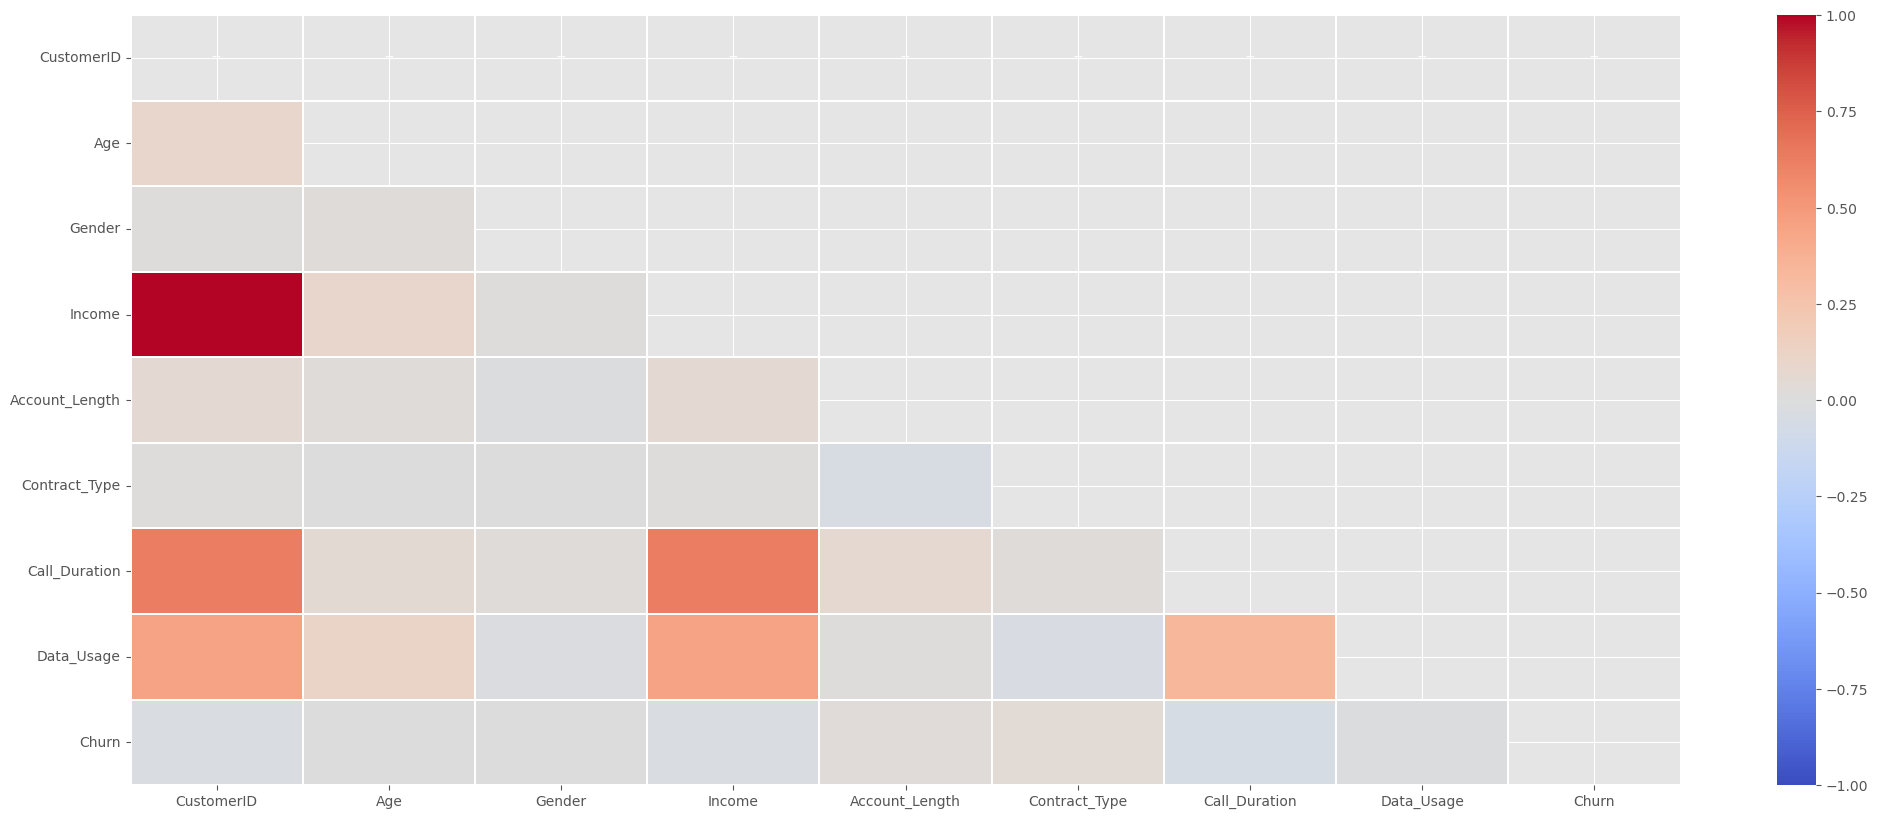

In [35]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

## Understanding the Target Variable Churn

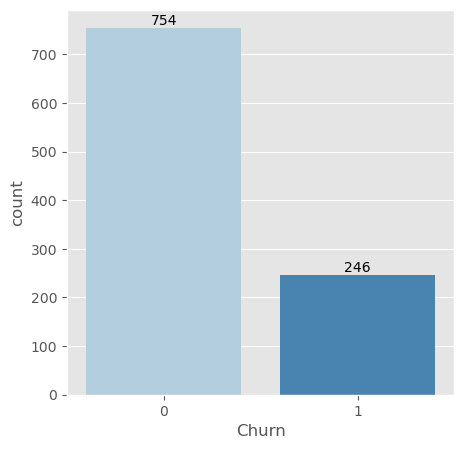

In [36]:
#Apply the ggplot style
plt.style.use("ggplot")
plt.figure(figsize=(5,5))
ax = sns.countplot(x = df["Churn"],palette="Blues")
ax.bar_label(ax.containers[0])
plt.show()

## Churn Distribution w.r.t to features

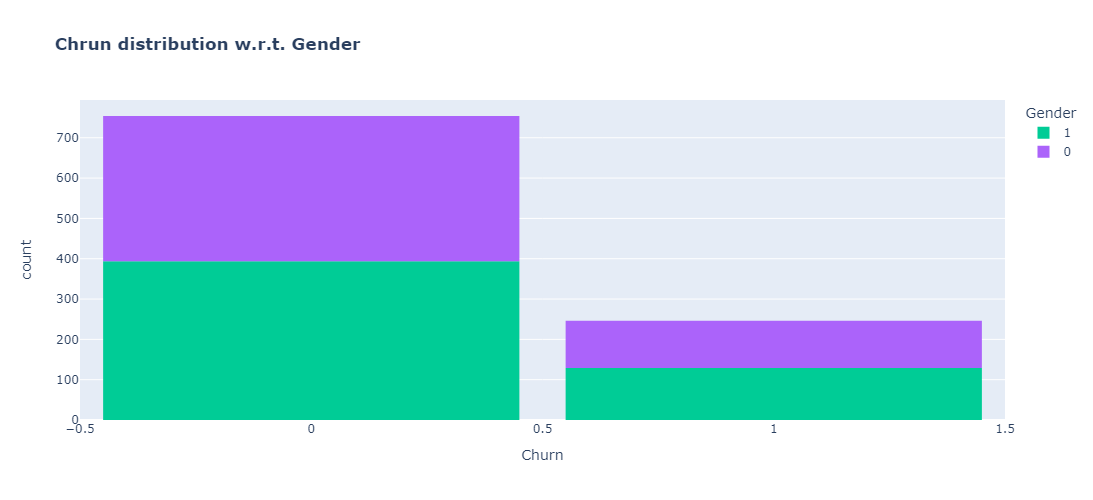

In [37]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="Gender", title="<b>Chrun distribution w.r.t. Gender</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

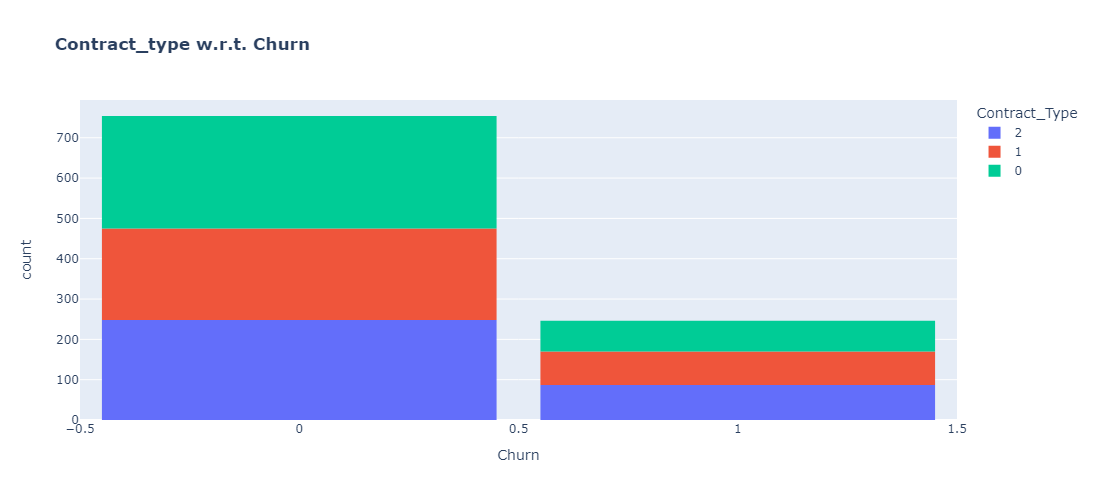

In [38]:
fig = px.histogram(df, x="Churn", color="Contract_Type", title="<b>Contract_type w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [39]:
def histogram_plots(df, numerical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)
    
    fig = plt.figure(figsize=(12,5*number_of_rows))
    
    for index, column in enumerate(numerical_values,1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.kdeplot(df[column][df["Churn"]==1] ,fill = True)
        ax = sns.kdeplot(df[column][df["Churn"]==0], fill = True)
        ax.set_title(column)
        ax.legend(["Churn","No Churn"], loc='upper right')
    plt.savefig("numerical_variables.png", dpi=300)
    return plt.show()

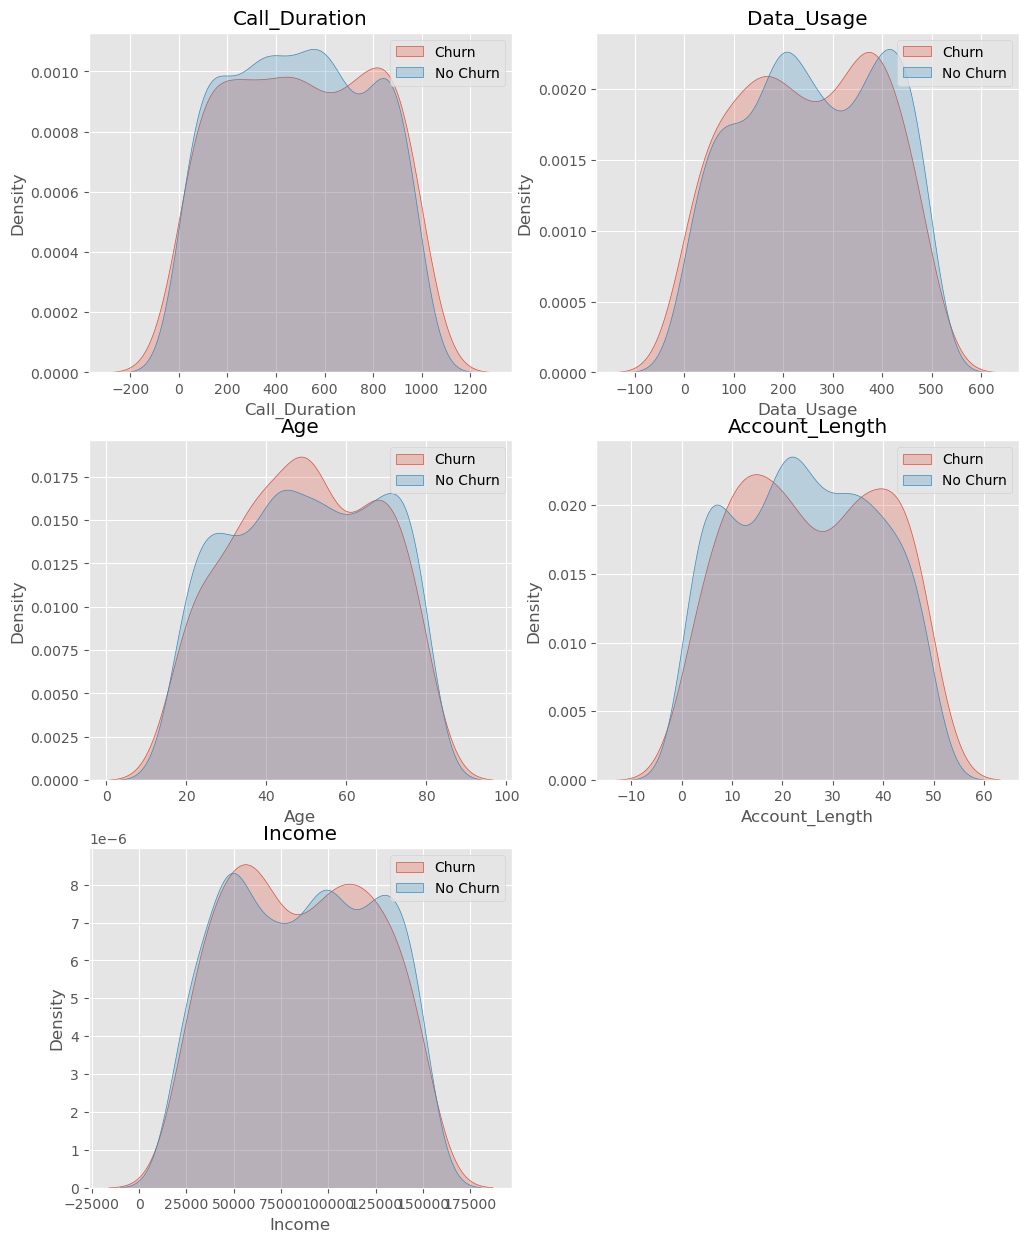

In [40]:
customer_account_num = ["Call_Duration","Data_Usage","Age","Account_Length","Income"]
histogram_plots(df,customer_account_num, "Churn")

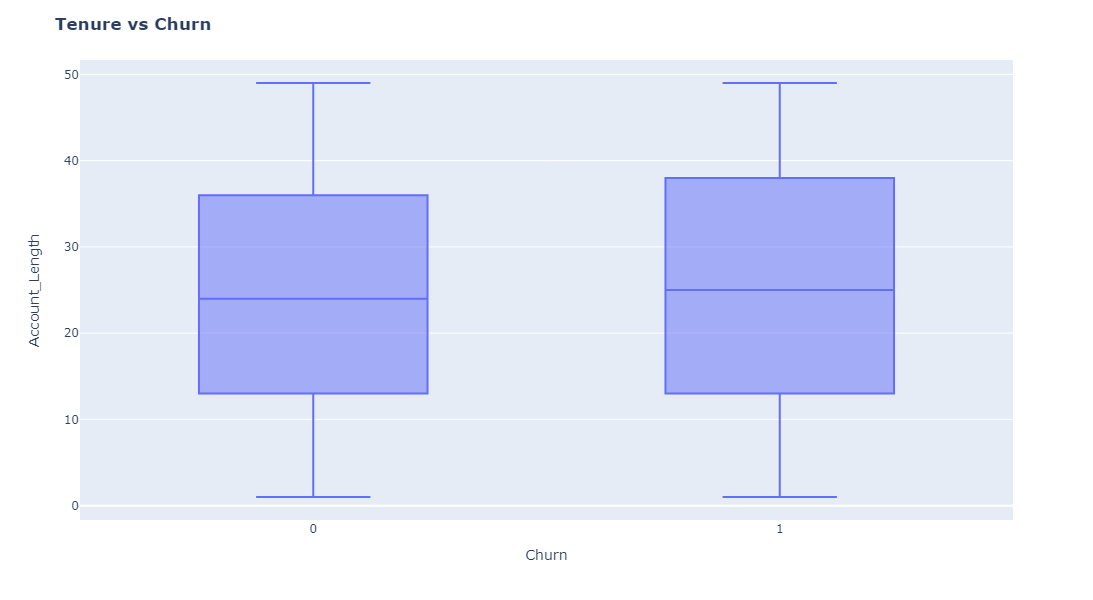

In [41]:
fig = px.box(df, x='Churn', y = 'Account_Length')

# Update yaxis properties
fig.update_yaxes(title_text='Account_Length', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

## Outlier Detection

In [42]:
def outlier_check_boxplot(df,numerical_values):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)
    
    fig = plt.figure(figsize=(12,5*number_of_rows))
    for index, column in enumerate(numerical_values, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.boxplot(x = column, data = df, palette = "Blues")
        ax.set_title(column)
    plt.savefig("Outliers_check.png", dpi=300)
    return plt.show()

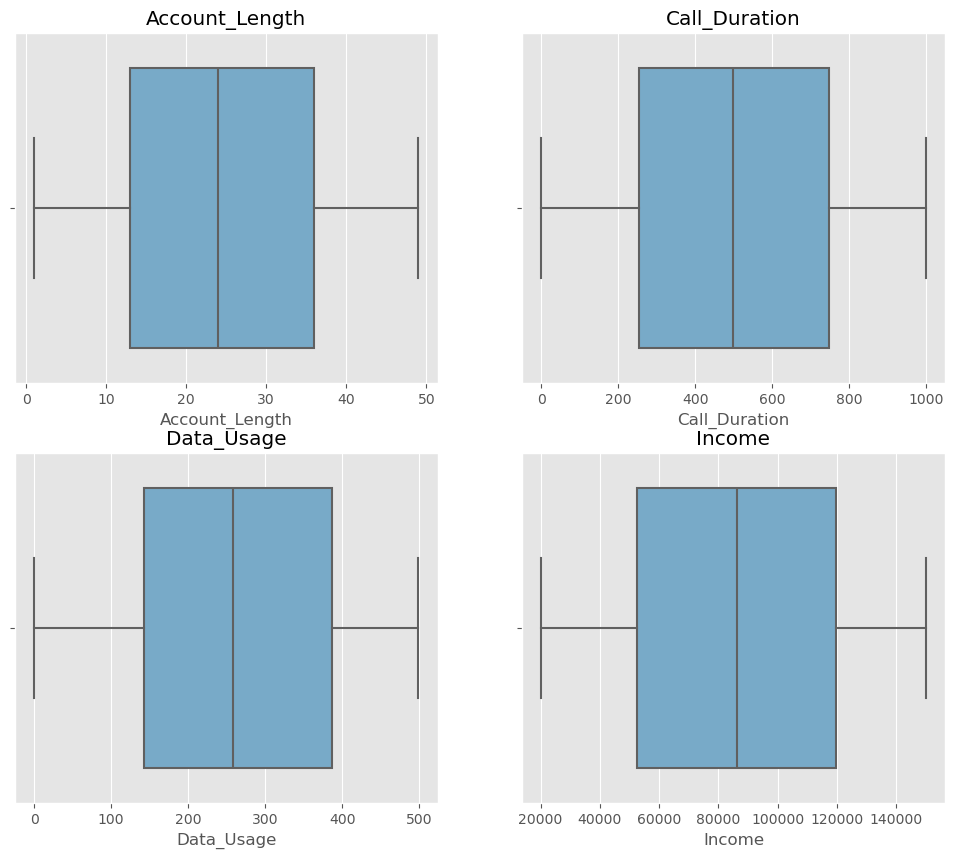

In [43]:
numerical_values = ["Account_Length","Call_Duration","Data_Usage","Income"]
outlier_check_boxplot(df,numerical_values)

<Axes: xlabel='Account_Length'>

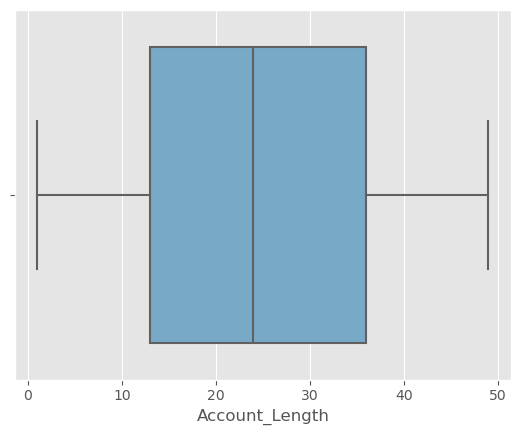

In [44]:
sns.boxplot(x = df["Account_Length"], data = df, palette = "Blues")

<Axes: >

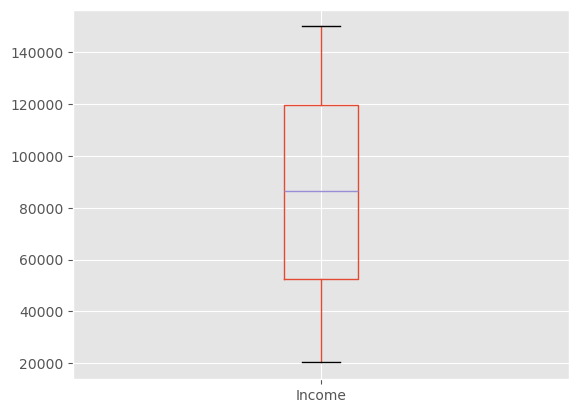

In [45]:
df.boxplot(['Income'])